In [191]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import pandas as pd

In [192]:
variables = ["AP","AR","AS","BR","CG","GA","GJ","HR","HP","JH","KA","KL","MP","MH","MN","ML","MZ","NL","OD","PB","RJ","SK","TN","TS","TR","UP","UK","WB","JK"]
colors = ["Red", "Green", "Blue",'Purple']

# Adjacency list (neighbors)
neighbors = {
    "AP": ["TS","OD","TN","KA"],
    "AR": ["AS","NL"],
    "AS": ["AR","NL","ML","TR","MZ","MN","WB"],
    "BR": ["UP","JH","WB"],
    "CG": ["UP","JH","OD","MH"],
    "GA": ["MH","KA"],
    "GJ": ["MH","RJ"],
    "HR": ["PB","HP","UK","RJ"],
    "HP": ["JK","PB","HR","UK"],
    "JH": ["BR","UP","CG","OD","WB"],
    "KA": ["MH","AP","TS","TN","KL","GA"],
    "KL": ["KA","TN"],
    "MP": ["RJ","UP","CG","MH","GJ"],
    "MH": ["GJ","MP","CG","TS","KA","GA"],
    "MN": ["AS","MZ","NL"],
    "ML": ["AS","TR"],
    "MZ": ["AS","MN","TR"],
    "NL": ["AR","AS","MN"],
    "OD": ["WB","JH","CG","AP","TS"],
    "PB": ["JK","HP","HR","RJ"],
    "RJ": ["PB","HR","MP","GJ","UP"],
    "SK": ["WB"],
    "TN": ["AP","KA","KL"],
    "TS": ["MH","KA","AP","OD"],
    "TR": ["AS","ML","MZ"],
    "UP": ["UK","HR","RJ","MP","CG","JH","BR"],
    "UK": ["HP","HR","UP"],
    "WB": ["BR","JH","OD","AS","SK"],
    "JK": []
}

In [193]:
# Check if assignment is valid
def is_valid(assignment, var, value):
    for n in neighbors[var]:
        if n in assignment and assignment[n] == value:
            return False
    return True

In [194]:
#Plain Backtracking
plain_steps = 0
def backtrack_plain(assignment):
    global plain_steps
    plain_steps += 1

    if len(assignment) == len(variables):
        return assignment

    for var in variables:
        if var not in assignment:
            break

    for value in colors:
        if is_valid(assignment, var, value):
            assignment[var] = value
            result = backtrack_plain(assignment)
            if result:
                return result
            del assignment[var]

    return None

In [195]:
#Visualization
def visualize_coloring(solution, title):
    G = nx.Graph()

    for var in variables:
        G.add_node(var)
    for var, neighs in neighbors.items():
        for n in neighs:
            G.add_edge(var, n)

    pos = {
      "JK": (2, 10), "HP": (3, 9), "PB": (2, 9), "HR": (3, 8), "UK": (4, 8), "UP": (5, 8),
      "RJ": (2, 7), "BR": (6, 8), "SK": (8, 9),
      "AS": (9, 8), "AR": (10, 9), "NL": (11, 9), "MN": (11, 8),
      "MZ": (11, 7), "TR": (12, 7), "ML": (10, 8),
      "MP": (4, 6), "CG": (6, 6), "JH": (7, 7), "WB": (8, 7),
      "GJ": (1, 6), "MH": (3, 5), "GA": (2, 4),
      "KA": (3, 3), "TS": (4, 3), "AP": (5, 2), "OD": (6, 5),
      "KL": (2, 1), "TN": (4, 1),

  }
    node_colors = [solution.get(node, "white") for node in G.nodes()]

    plt.figure(figsize=(6, 6))
    nx.draw(
        G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=450,
        font_size=8,
        font_weight="bold",
        edge_color="black"
    )
    plt.title(title)
    plt.show()

Plain Backtracking Solution: {'AP': 'Red', 'AR': 'Red', 'AS': 'Green', 'BR': 'Red', 'CG': 'Red', 'GA': 'Red', 'GJ': 'Red', 'HR': 'Red', 'HP': 'Green', 'JH': 'Green', 'KA': 'Green', 'KL': 'Red', 'MP': 'Green', 'MH': 'Blue', 'MN': 'Red', 'ML': 'Red', 'MZ': 'Blue', 'NL': 'Blue', 'OD': 'Blue', 'PB': 'Blue', 'RJ': 'Purple', 'SK': 'Red', 'TN': 'Blue', 'TS': 'Purple', 'TR': 'Purple', 'UP': 'Blue', 'UK': 'Purple', 'WB': 'Purple', 'JK': 'Red'}
Plain Backtracking Steps: 30




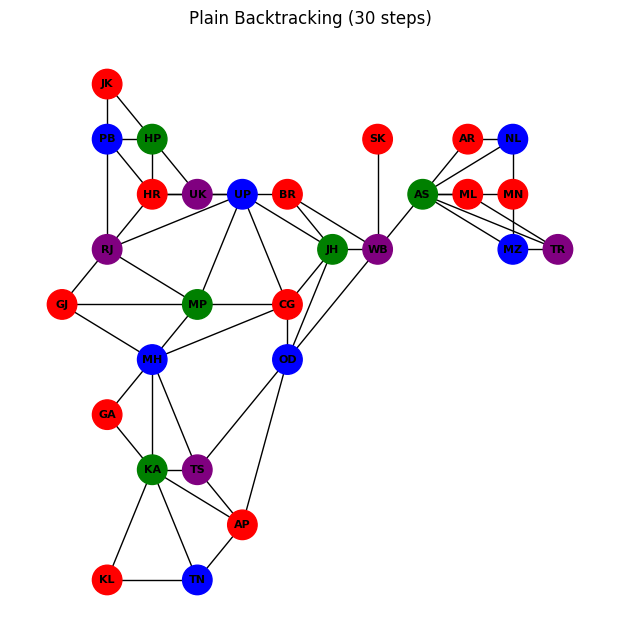

In [196]:
# Plain Backtracking
plain_solution = backtrack_plain({})
print("Plain Backtracking Solution:", plain_solution)
print("Plain Backtracking Steps:", plain_steps)
print('\n')
visualize_coloring(plain_solution, f"Plain Backtracking ({plain_steps} steps)")

In [197]:
#Backtracking with MRV + LCV

# Minimum Remaining Values (MRV) heuristic
def select_unassigned_var(assignment):
    unassigned = [v for v in variables if v not in assignment]
    return min(unassigned, key=lambda var: sum(is_valid(assignment, var, c) for c in colors))

# Least Constraining Value (LCV) heuristic
def order_domain_values(var, assignment):
    def conflicts(val):
        return sum(
            1 for n in neighbors[var]
            if n not in assignment and not is_valid({**assignment, var: val}, n, val)
        )
    return sorted(colors, key=conflicts)

In [198]:
# Minimum Remaining Values (MRV) heuristic
def select_unassigned_var(assignment):
    unassigned = [v for v in variables if v not in assignment]
    return min(unassigned, key=lambda var: sum(is_valid(assignment, var, c) for c in colors))

# Least Constraining Value (LCV) heuristic
def order_domain_values(var, assignment):
    def conflicts(val):
        return sum(
            1 for n in neighbors[var]
            if n not in assignment and not is_valid({**assignment, var: val}, n, val)
        )
    return sorted(colors, key=conflicts)

In [199]:
#Backtracking with MRV + LCV
heuristic_steps = 0
def backtrack_heuristic(assignment):
    global heuristic_steps
    heuristic_steps += 1

    if len(assignment) == len(variables):
        return assignment

    var = select_unassigned_var(assignment)
    print(f"[MRV] Selected {var}, Domain Order (LCV): {order_domain_values(var, assignment)}")

    for val in order_domain_values(var, assignment):
        if is_valid(assignment, var, val):
            assignment[var] = val
            result = backtrack_heuristic(assignment)
            if result:
                return result
            del assignment[var]
    return None

In [200]:
#AC-3
def ac3(domains):
    queue = deque([(xi, xj) for xi in variables for xj in neighbors[xi]])
    while queue:
        xi, xj = queue.popleft()
        if revise(domains, xi, xj):
            if not domains[xi]:
                return False
            for xk in neighbors[xi]:
                if xk != xj:
                    queue.append((xk, xi))
    return True

def revise(domains, xi, xj):
    revised = False
    to_remove = []
    for x in domains[xi]:
        if not any(x != y for y in domains[xj]):
            to_remove.append(x)
            revised = True
    for val in to_remove:
        domains[xi].remove(val)
    return revised

[MRV] Selected AP, Domain Order (LCV): ['Red', 'Green', 'Blue', 'Purple']
[MRV] Selected KA, Domain Order (LCV): ['Red', 'Green', 'Blue', 'Purple']
[MRV] Selected TN, Domain Order (LCV): ['Red', 'Green', 'Blue', 'Purple']
[MRV] Selected KL, Domain Order (LCV): ['Red', 'Green', 'Blue', 'Purple']
[MRV] Selected TS, Domain Order (LCV): ['Red', 'Green', 'Blue', 'Purple']
[MRV] Selected MH, Domain Order (LCV): ['Red', 'Green', 'Blue', 'Purple']
[MRV] Selected GA, Domain Order (LCV): ['Red', 'Green', 'Blue', 'Purple']
[MRV] Selected OD, Domain Order (LCV): ['Red', 'Green', 'Blue', 'Purple']
[MRV] Selected CG, Domain Order (LCV): ['Red', 'Green', 'Blue', 'Purple']
[MRV] Selected JH, Domain Order (LCV): ['Red', 'Green', 'Blue', 'Purple']
[MRV] Selected MP, Domain Order (LCV): ['Green', 'Blue', 'Purple', 'Red']
[MRV] Selected UP, Domain Order (LCV): ['Red', 'Green', 'Blue', 'Purple']
[MRV] Selected BR, Domain Order (LCV): ['Red', 'Green', 'Blue', 'Purple']
[MRV] Selected RJ, Domain Order (LCV):

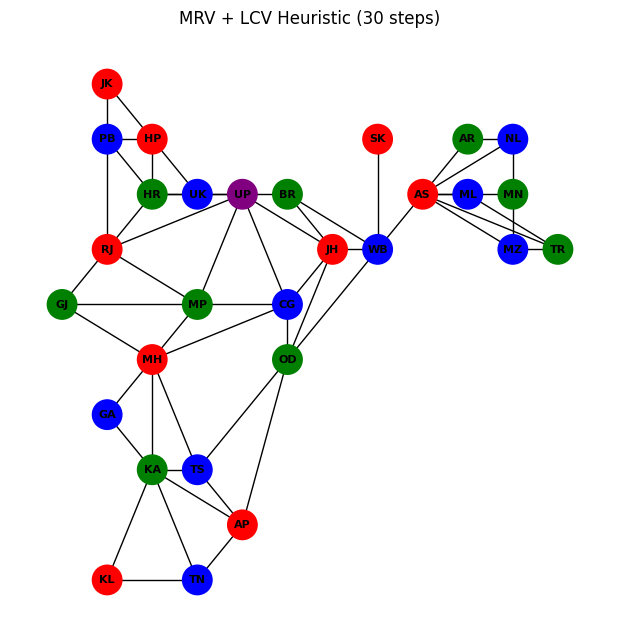

In [201]:
# Backtracking with MRV + LCV
heuristic_solution = backtrack_heuristic({})
print('\n')
print("Backtracking with MRV + LCV Solution:", heuristic_solution)
print("Backtracking with MRV + LCV Steps:", heuristic_steps)
print('\n')
visualize_coloring(heuristic_solution, f"MRV + LCV Heuristic ({heuristic_steps} steps)")

In [202]:
#Backtracking with MRV + LCV + AC-3
ac3_steps = 0
def backtrack_ac3(assignment, domains):
    global ac3_steps
    ac3_steps += 1

    if len(assignment) == len(variables):
        return assignment

    unassigned = [v for v in variables if v not in assignment]
    var = min(unassigned, key=lambda v: len(domains[v]))
    print(f"[MRV+AC3] Selected {var}, Domain Before: {domains[var]}")

    for val in order_domain_values(var, assignment):
        if is_valid(assignment, var, val):
            local_assignment = assignment.copy()
            local_assignment[var] = val

            local_domains = {v: list(domains[v]) for v in domains}
            local_domains[var] = [val]

            if ac3(local_domains):
                result = backtrack_ac3(local_assignment, local_domains)
                if result:
                    return result
    return None

[MRV+AC3] Selected AP, Domain Before: ['Red', 'Green', 'Blue', 'Purple']
[MRV+AC3] Selected KA, Domain Before: ['Green', 'Blue', 'Purple']
[MRV+AC3] Selected TN, Domain Before: ['Blue', 'Purple']
[MRV+AC3] Selected KL, Domain Before: ['Red', 'Purple']
[MRV+AC3] Selected TS, Domain Before: ['Blue', 'Purple']
[MRV+AC3] Selected MH, Domain Before: ['Red', 'Purple']
[MRV+AC3] Selected GA, Domain Before: ['Blue', 'Purple']
[MRV+AC3] Selected OD, Domain Before: ['Green', 'Purple']
[MRV+AC3] Selected CG, Domain Before: ['Blue', 'Purple']
[MRV+AC3] Selected JH, Domain Before: ['Red', 'Purple']
[MRV+AC3] Selected MP, Domain Before: ['Green', 'Purple']
[MRV+AC3] Selected UP, Domain Before: ['Purple']
[MRV+AC3] Selected BR, Domain Before: ['Green', 'Blue']
[MRV+AC3] Selected RJ, Domain Before: ['Red', 'Blue']
[MRV+AC3] Selected HR, Domain Before: ['Green', 'Blue']
[MRV+AC3] Selected PB, Domain Before: ['Blue', 'Purple']
[MRV+AC3] Selected HP, Domain Before: ['Red', 'Purple']
[MRV+AC3] Selected UK

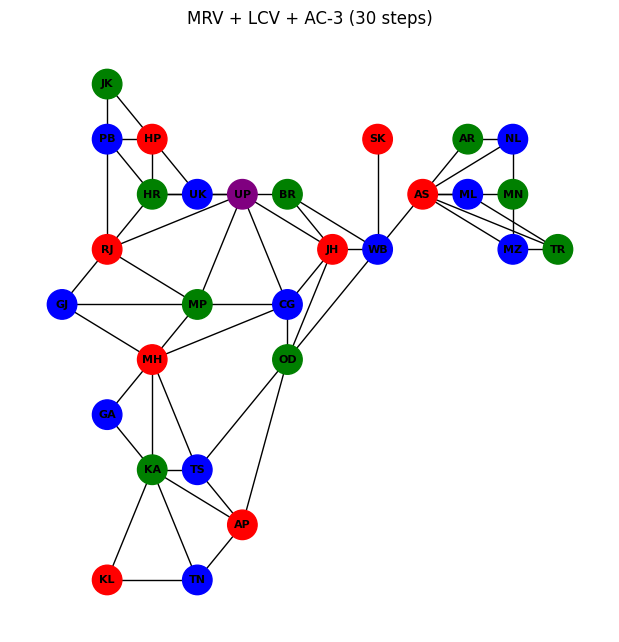

In [203]:
#AC-3
init_domains = {v: list(colors) for v in variables}
ac3_solution = backtrack_ac3({}, init_domains)
print('\n')
print("Backtracking with MRV + LCV + AC-3 Solution:", ac3_solution)
print("Backtracking with MRV + LCV + AC-3 Steps:", ac3_steps)
print('\n')
visualize_coloring(ac3_solution, f"MRV + LCV + AC-3 ({ac3_steps} steps)")

In [204]:
summary = pd.DataFrame({
    "Algorithm": ["Plain Backtracking", "MRV + LCV", "MRV + LCV + AC-3"],
    "Steps": [plain_steps, heuristic_steps, ac3_steps]
})
print("\nSummary Table:\n", summary)


Summary Table:
             Algorithm  Steps
0  Plain Backtracking     30
1           MRV + LCV     30
2    MRV + LCV + AC-3     30
